In [14]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter, StrMethodFormatter

Create a dataset indicating which of the four default tests were passed by which code:

In [15]:
data = pd.read_csv("processed_solutions/m0_data.csv")
tests = pd.read_csv("processed_solutions/passing_test.csv")

In [16]:
if len(tests)<len(data):
    print("NEED TO UPDATE THE PASSING TESTS FILE!")
else:
    test_results = data.merge(tests, how="left", on=["name", "source", "style", "version"])
    test_results["num_tests_passed"] = test_results[["test_1", "test_2", "hidden_test_1", "hidden_test_2"]].sum(axis=1)
    test_results["%_tests_passed"] = test_results["num_tests_passed"]/4*100
    test_results["version"] = test_results["version"].fillna(test_results["source"])

### Differences in passing tests, by different sources/model versions:

In [17]:
mean_num_tests_passed = test_results.groupby("version").agg({"num_tests_passed":"mean", "%_tests_passed":"mean", "source":"min"}).reset_index().sort_values("%_tests_passed")

In [20]:
test_results

,name,source,style,version,code,test_1,test_2,hidden_test_1,hidden_test_2,num_tests_passed,%_tests_passed
0,1,gpt3.5,plain,gpt3.5,package thkoeln.st.st2praktikum.exercise;\n\np...,False,False,False,True,1.0,25.0
1,10,gpt3.5,plain,gpt3.5,package thkoeln.st.st2praktikum.exercise;\n\np...,True,False,False,False,1.0,25.0
2,11,gpt3.5,cc,gpt3.5,package thkoeln.st.st2praktikum.exercise;\n\ni...,False,False,False,False,0.0,0.0
3,12,gpt3.5,cc,gpt3.5,package thkoeln.st.st2praktikum.exercise;\n\np...,False,False,False,False,0.0,0.0
4,13,gpt3.5,cc,gpt3.5,package thkoeln.st.st2praktikum.exercise;\n\ni...,False,False,False,False,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
194,student92,student,NaN,student,package thkoeln.st.st2praktikum.exercise;\n\np...,True,True,True,True,4.0,100.0
195,student94,student,NaN,student,package thkoeln.st.st2praktikum.exercise;\npub...,True,True,True,True,4.0,100.0
196,student96,student,NaN,student,package thkoeln.st.st2praktikum.exercise;\n\np...,True,True,True,True,4.0,100.0
197,student97,student,NaN,student,package thkoeln.st.st2praktikum.exercise;\n\n\...,True,True,True,True,4.0,100.0


In [25]:
test_results.groupby("source").mean()

,num_tests_passed,%_tests_passed
source,,
bard,0.058824,1.470588
bing,1.035714,25.892857
gpt3.5,0.263158,6.578947
gpt4,1.161290,29.032258
student,3.923077,98.076923


In [24]:
test_results.groupby("version").mean()

,num_tests_passed,%_tests_passed
version,,
balanced,1.142857,28.571429
bard,0.058824,1.470588
concise,1.111111,27.777778
creative,0.916667,22.916667
gpt3.5,0.263158,6.578947
gpt4,1.161290,29.032258
student,3.923077,98.076923


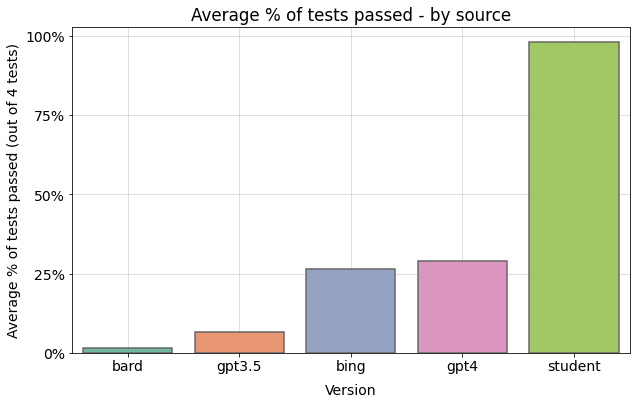

In [40]:
plt.rcParams.update({"font.size": 14})
sns.set_palette('Set2')
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=mean_num_tests_passed, x="source", y="%_tests_passed",
            ci=None, zorder=2, linewidth=1.5, edgecolor="0.4", ax=ax)
ax.set_ylabel("Average % of tests passed (out of 4 tests)")
ax.set_xlabel("Version", labelpad=10)
ax.grid(zorder=-1, alpha=0.5)
ax.set_yticks([0, 25, 50, 75, 100])
ax.yaxis.set_major_formatter(StrMethodFormatter(u"{x}%"))
ax.set_title("Average % of tests passed - by source");

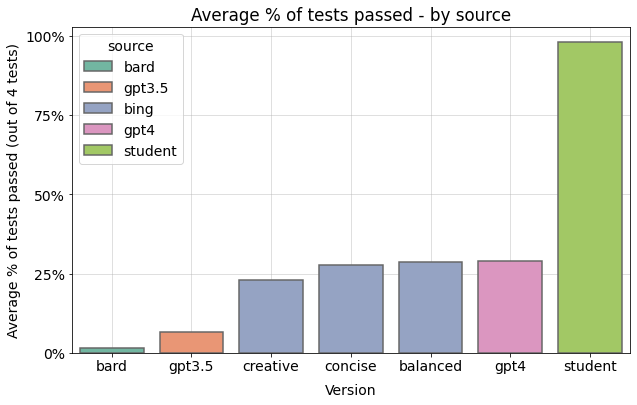

In [27]:
plt.rcParams.update({"font.size": 14})
sns.set_palette('Set2')
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=mean_num_tests_passed, x="version", y="%_tests_passed", hue="source", 
            dodge=False, zorder=2, linewidth=1.5, edgecolor="0.4", ax=ax)
ax.set_ylabel("Average % of tests passed (out of 4 tests)")
ax.set_xlabel("Version", labelpad=10)
ax.grid(zorder=-1, alpha=0.5)
ax.set_yticks([0, 25, 50, 75, 100])
ax.yaxis.set_major_formatter(StrMethodFormatter(u"{x}%"))
ax.set_title("Average % of tests passed - by source");

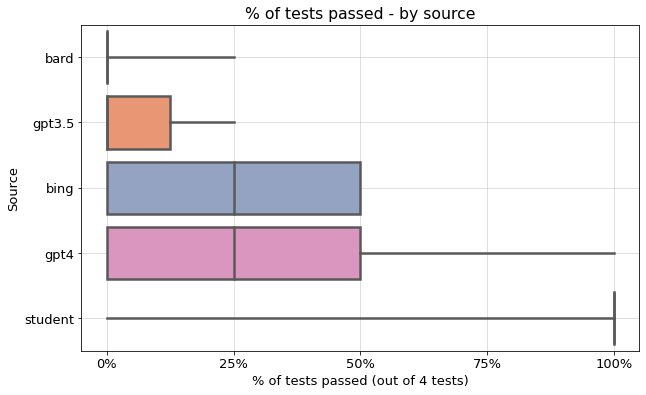

In [36]:
sns.set_palette('Set2')
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=test_results, x="%_tests_passed", y="source", 
            whis=[0, 100], capprops={"alpha":0}, linewidth=2.5,
            order=["bard", "gpt3.5", "bing", "gpt4", "student"])
ax.set_axisbelow(True)
ax.grid(alpha=0.5)
ax.set_xticks([0, 25, 50, 75, 100])
ax.xaxis.set_major_formatter(StrMethodFormatter(u"{x}%"))
ax.set_xlabel("% of tests passed (out of 4 tests)")
ax.set_ylabel("Source")
ax.set_title("% of tests passed - by source");

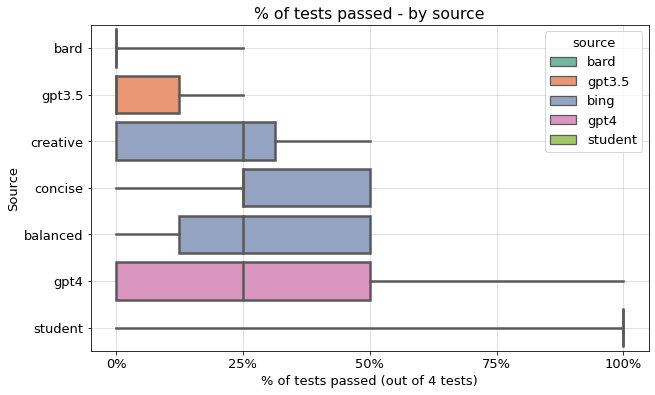

In [39]:
sns.set_palette('Set2')
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=test_results, x="%_tests_passed", y="version", hue="source",
            dodge=False, whis=[0, 100], capprops={"alpha":0}, linewidth=2.5,
            order=["bard", "gpt3.5", "creative", "concise", "balanced", "gpt4", "student"],
            hue_order=["bard", "gpt3.5", "bing", "gpt4", "student"])
ax.set_axisbelow(True)
ax.grid(alpha=0.5)
ax.set_xticks([0, 25, 50, 75, 100])
ax.xaxis.set_major_formatter(StrMethodFormatter(u"{x}%"))
ax.set_xlabel("% of tests passed (out of 4 tests)")
ax.set_ylabel("Source")
ax.set_title("% of tests passed - by source");

### Differences in passing tests, by different styling prompts:

In [30]:
tests_passed_style = test_results.groupby("style").mean().reset_index().sort_values("%_tests_passed")

In [31]:
test_results.groupby("style").mean()

,num_tests_passed,%_tests_passed
style,,
cc,0.526316,13.157895
plain,0.714286,17.857143
styled,0.962963,24.074074


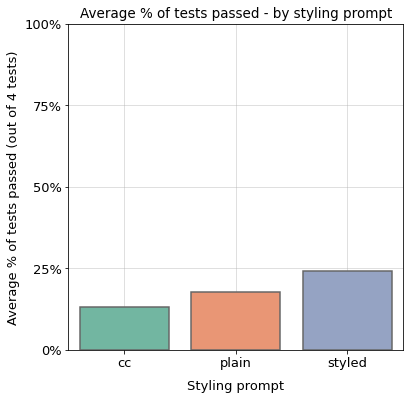

In [41]:
plt.rcParams.update({"font.size": 13})
sns.set_palette('Set2')
fig, ax = plt.subplots(figsize=(6, 6))
sns.barplot(data=tests_passed_style, x="style", y="%_tests_passed", 
            linewidth=1.5, edgecolor="0.4", zorder=2, ax=ax)
ax.set_ylabel("Average % of tests passed (out of 4 tests)")
ax.set_xlabel("Styling prompt", labelpad=10)
ax.grid(alpha=0.5, zorder=-2)
ax.set_yticks([0, 25, 50, 75, 100])
ax.yaxis.set_major_formatter(StrMethodFormatter(u"{x}%"))
ax.set_title("Average % of tests passed - by styling prompt", fontsize=13.5);

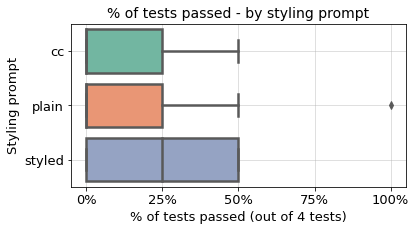

In [34]:
fig, ax = plt.subplots(figsize=(6, 3))
sns.boxplot(data=test_results, x="%_tests_passed", y="style", 
            dodge=False, whis=[0, 95], linewidth=2.5,
            order=["cc", "plain", "styled"])
ax.set_axisbelow(True)
ax.grid(alpha=0.5)
ax.set_xticks([0, 25, 50, 75, 100])
ax.xaxis.set_major_formatter(StrMethodFormatter(u"{x}%"))
ax.set_xlabel("% of tests passed (out of 4 tests)")
ax.set_ylabel("Styling prompt")
ax.set_title("% of tests passed - by styling prompt", fontsize=14);

### Differences in passing tests, by different styling prompts and sources:

Due to the very low sample sizes at this level of stratification, these results are extremely unreliable.

In [42]:
test_passed_ver_style = test_results.groupby(["source", "style"]).agg({"num_tests_passed":"mean", "%_tests_passed":"mean"}).reset_index().sort_values("%_tests_passed")

In [43]:
test_results.groupby(["source", "style"]).mean()

num_tests_passed  %_tests_passed
source style                                   
bard   cc              0.000000        0.000000
       plain           0.125000        3.125000
       styled          0.000000        0.000000
bing   cc              1.000000       25.000000
       plain           0.916667       22.916667
       styled          1.222222       30.555556
gpt3.5 cc              0.000000        0.000000
       plain           0.300000        7.500000
       styled          0.400000       10.000000
gpt4   cc              0.750000       18.750000
       plain           1.052632       26.315789
       styled          1.625000       40.625000

In [44]:
test_results.groupby(["source", "style"]).count()["code"]

source  style 
bard    cc         4
        plain      8
        styled     5
bing    cc         7
        plain     12
        styled     9
gpt3.5  cc         4
        plain     10
        styled     5
gpt4    cc         4
        plain     19
        styled     8
Name: code, dtype: int64

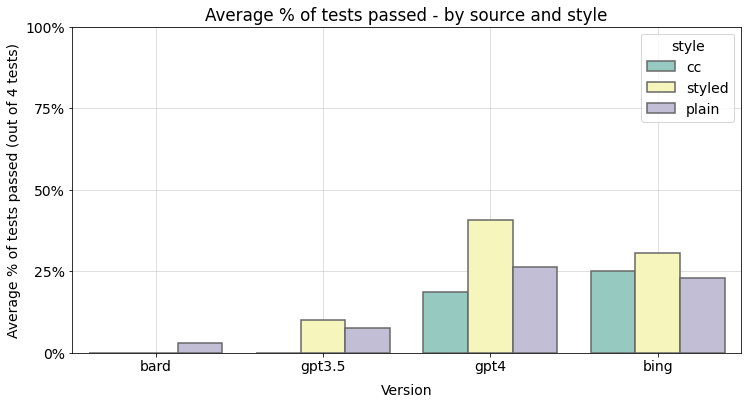

In [45]:
plt.rcParams.update({"font.size": 14})
sns.set_palette("Set3")
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=test_passed_ver_style, x="source", y="%_tests_passed", hue="style",
            zorder=2, linewidth=1.5, edgecolor="0.4", ax=ax)
ax.set_ylabel("Average % of tests passed (out of 4 tests)")
ax.set_xlabel("Version", labelpad=10)
ax.grid(zorder=-1, alpha=0.5)
ax.set_yticks([0, 25, 50, 75, 100])
ax.yaxis.set_major_formatter(StrMethodFormatter(u"{x}%"))
ax.set_title("Average % of tests passed - by source and style");